<a href="https://colab.research.google.com/github/venkatesh1378/CNN/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"venkat12354","key":"06740a02862b36b2b03c28f99eff93cf"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:12<00:00, 173MB/s]
100% 1.06G/1.06G [00:12<00:00, 89.1MB/s]


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/dogs-vs-cats.zip','r') as obj:
  obj.extractall('/content')
  obj.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from keras.layers import Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 89ms/step - loss: 0.2704 - accuracy: 0.8870 - val_loss: 0.2096 - val_accuracy: 0.9132
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1950 - accuracy: 0.9211 - val_loss: 0.2165 - val_accuracy: 0.9082
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1567 - accuracy: 0.9366 - val_loss: 0.2288 - val_accuracy: 0.9062
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1306 - accuracy: 0.9481 - val_loss: 0.2209 - val_accuracy: 0.9106
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1058 - accuracy: 0.9576 - val_loss: 0.2331 - val_accuracy: 0.9150
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0819 - accuracy: 0.9686 - val_loss: 0.2555 - val_accuracy: 0.9162
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0549 - accuracy: 0.9807 - val_loss: 0.2674 - val_acc

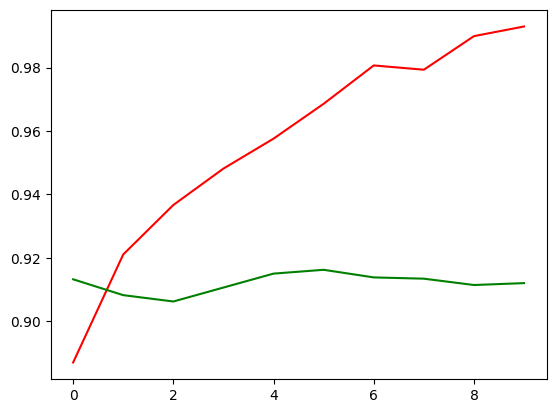

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color='red',label='tarin')
plt.plot(history.history["val_accuracy"],color='green',label='validation')



In [ ]:
# the model is overfitted
# tarin accuracy is 99%
#validation is only 91%

In [ ]:
# we use techniques
# data augemntation
# dropouts

In [ ]:
# we will try to use the fine tuning for this model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-32-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 170s 270ms/step - loss: 0.2110 - accuracy: 0.9151 - val_loss: 0.2285 - val_accuracy: 0.9080
Epoch 2/10
625/625 [==============================] - 158s 254ms/step - loss: 0.1809 - accuracy: 0.9227 - val_loss: 0.2184 - val_accuracy: 0.9198
Epoch 3/10
625/625 [==============================] - 168s 269ms/step - loss: 0.1698 - accuracy: 0.9285 - val_loss: 0.2365 - val_accuracy: 0.9144
Epoch 4/10
625/625 [==============================] - 176s 281ms/step - loss: 0.1521 - accuracy: 0.9377 - val_loss: 0.2041 - val_accuracy: 0.9166
Epoch 6/10
625/625 [==============================] - 171s 274ms/step - loss: 0.1402 - accuracy: 0.9421 - val_loss: 0.2182 - val_accuracy: 0.9158
Epoch 7/10
625/625 [==============================] - 158s 254ms/step - loss: 0.1392 - accuracy: 0.9422 - val_loss: 0.2087 - val_accuracy: 0.9128
Epoch 8/10
625/625 [==============================] - 156s 249ms/step - loss: 0.1297 - accuracy: 0.9464 - val_loss: 0.2254 -

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable=False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 101ms/step - loss: 0.3043 - accuracy: 0.8680 - val_loss: 0.2986 - val_accuracy: 0.8680
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2327 - accuracy: 0.9018 - val_loss: 0.2096 - val_accuracy: 0.9038
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2095 - accuracy: 0.9110 - val_loss: 0.2003 - val_accuracy: 0.9094
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1938 - accuracy: 0.9207 - val_loss: 0.2135 - val_accuracy: 0.9068
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1829 - accuracy: 0.9234 - val_loss: 0.1963 - val_accuracy: 0.9118
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1692 - accuracy: 0.9288 - val_loss: 0.1933 - val_accuracy: 0.9170
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1559 - accuracy: 0.9354 - val_loss: 0.2216 - val_accurac

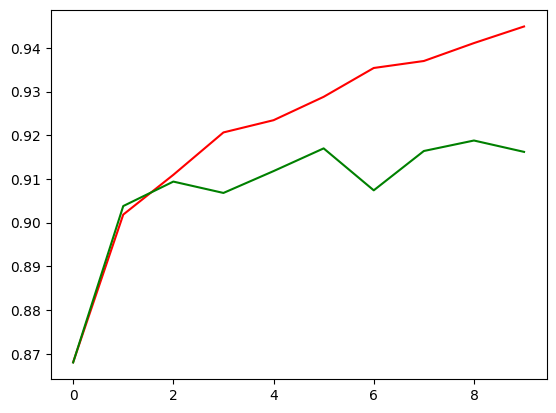

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color='red',label='tarin')
plt.plot(history.history["val_accuracy"],color='green',label='validation')



**FINE TUNING**

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model_ft = Sequential()

model_ft.add(conv_base)
model_ft.add(Flatten())

model_ft.add(Dense(256,activation='relu'))
model_ft.add(Dense(1,activation='sigmoid'))

In [ ]:
# generators
train_ds_1 = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds_1 = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds_1 = train_ds_1.map(process)
validation_ds_1 = validation_ds_1.map(process)

In [ ]:
model_ft.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model_ft.fit(train_ds_1,epochs=10,validation_data=validation_ds_1)

Epoch 1/10
625/625 [==============================] - 78s 122ms/step - loss: 0.6177 - accuracy: 0.8552 - val_loss: 0.1454 - val_accuracy: 0.9414
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.1713 - accuracy: 0.9358 - val_loss: 0.1388 - val_accuracy: 0.9462
Epoch 3/10
625/625 [==============================] - 76s 122ms/step - loss: 0.1253 - accuracy: 0.9564 - val_loss: 0.1722 - val_accuracy: 0.9368
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0912 - accuracy: 0.9690 - val_loss: 0.1529 - val_accuracy: 0.9460
Epoch 5/10
625/625 [==============================] - 76s 121ms/step - loss: 0.0687 - accuracy: 0.9768 - val_loss: 0.1894 - val_accuracy: 0.9466
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.1987 - val_accuracy: 0.9372
Epoch 7/10
625/625 [==============================] - 76s 121ms/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.2241 - val_ac

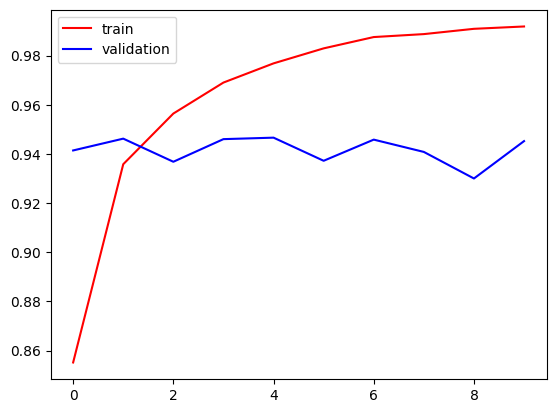

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()